# **TIME SERIES ANALYSIS**

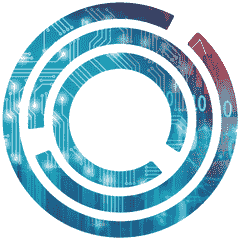

**Time series analysis is the examination of a series of data points ordered in time. Time is often independent to other features in the data and these usually help in forecasting future trends. There are many angles to time series data and can get quite complex and overwhleming while aprroching it. A good example of time series data is the stock market data.**

# **Description**

**This notebook intends to simplify difficult time series data from the Jane Street Market using Descriptive Statistics and Exploratory Data Analysis. This involves statistics, exploring each feature and its relationship with others, visualizing them, and finally drawing conclusions. Please upvote and share the notebook if you found it helpful in any way. Thank you in advance!**

 **FYI: This notebook is a work in progress, hence keep an eye out for upcoming updates!**

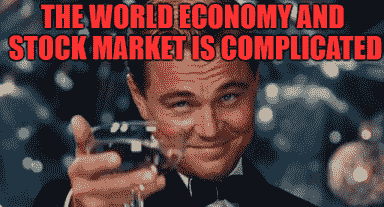

# **Content**

* Import Packages
* Data Loading
* Preliminary Analysis
* Missing Data
* Weight
* Tags
* Features
* ts_id

# **Import Packages**

In [ ]:
import warnings
import os
import numpy as np 
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

# **Data Loading**

In [ ]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
train_df = pd.read_csv('/kaggle/input/jane-street-market-prediction/train.csv')
print('Total number of entries in the train dataset are:', len(train_df))
train_df.head()

In [ ]:
fea_df = pd.read_csv('/kaggle/input/jane-street-market-prediction/features.csv', index_col = 0)
print('Total number of features are:', len(fea_df))
fea_df.head()

# **Preliminary Analysis**

In [ ]:
train_df.info()

In [ ]:
fea_df.info()

In [ ]:
train_df.shape

In [ ]:
fea_df.shape

In [ ]:
train_df.dtypes

In [ ]:
fea_df.dtypes

In [ ]:
train_df.describe()

In [ ]:
fea_df.describe()

# **Missing Data**

In [ ]:
train_df.isnull().sum()

In [ ]:
train_df.isna().head()

In [ ]:
fea_df.isnull().sum()

In [ ]:
fea_df.isna().head()

In [ ]:
px.bar(x = train_df.isnull().sum().index,y = train_df.isnull().sum().values, labels = dict(x = "Attributes", y = "Number of Missing Values"), title= 'Missing Data')

Features 7, 8, 17, 18, 27, 28 seem have very high number of missing values. They follow a pattern of 7s and 8s in the unit digit. Similarly features 72, 78, 84, 90, 96, 102, 108, 114 have high missing values too. They also follow a pattern of multiples of 6. These patterns are interesting to notice

# **Weights**

In [ ]:
null_weights = (train_df['weight'] == 0).sum()
total_weights = len(train_df['weight'])
null_weights_per = null_weights / total_weights * 100

print(f'The null weights account to {round(null_weights_per)}%')

In [ ]:
plt.figure(figsize = (15, 6))
plt.pie(((train_df.weight==0).mean(),(1-(train_df.weight==0).mean())), explode = (0, 0.1), labels=(f'Zero Weights\n{round((train_df.weight==0).mean()*100,2)}%',f'Non Zero Weights\n{round((1-(train_df.weight==0).mean())*100,2)}%'.format()), colors = ['#990000', '#006600'])
plt.show()

In [ ]:
date_weight_df = pd.DataFrame({'Date' : np.unique(train_df['date'].values), 'Zero_Weights' : train_df[train_df['weight'] == 0.0].groupby(['date']).size().values, 'Non_Zero_Weights' : train_df[train_df['weight'] != 0.0].groupby(['date']).size().values})
date_weight_df.head()

In [ ]:
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=(505, 100))

plt.xticks(rotation ='vertical', fontsize = 60)
plt.yticks(fontsize = 200)

ax = fig.add_subplot(111) 
ax2 = ax.twinx() 

date_weight_df.Non_Zero_Weights.plot(kind='bar',color='#00ff00',ax=ax, position = 0)
date_weight_df.Zero_Weights.plot(kind='bar',color='#ff0000', ax=ax2, position = 1)

ax.grid(None, axis = 'x')
ax2.grid(None)

ax.set_ylabel('Non Zero Weights', fontsize = 300)
ax2.set_ylabel('Zero Weights', fontsize = 300)
ax.set_xlabel('Time (In Days)',fontsize = 300)
fig.suptitle('Zero Weights Vs Non Zero Weights per Day', fontsize = 500)

ax.set_xlim(-1, 505)

plt.show()

We can observe that the non zero weighed entries account to a much higher ratio when compared to zero weighed entries per day over time. Overall, the trend has been that way. However, we can also see that in a handful of days, zero weighed entries are higher than the non weighed entries. For example, on day 168. 

# **Tags**

In [ ]:
(fea_df * 1).T.style.background_gradient(cmap = 'YlGnBu')

In [ ]:
fea_tags = fea_df.sum(axis = 1)
fea_tags_dict = {'Features' : fea_tags.index.values, 'Tag Count' : fea_tags.values}
fea_tags_df = pd.DataFrame(fea_tags_dict)
plt.figure(figsize = (130, 25))
plt.xlabel('Features', fontsize = 100)
plt.ylabel('Tag Count', fontsize = 100)
plt.title('Tag Counts of Features', fontsize = 120)
plt.xticks(rotation ='vertical', fontsize = 50)
plt.yticks(fontsize = 50)
sns.barplot(x = 'Features', y = 'Tag Count', data = fea_tags_df, palette = "rocket")
plt.show()

Features 72 to 119 all have 4 tags. In addition features 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, and 36 also have 4 tags which are features that are multiples of 2. On the flip side, features 41, 42, 43, 47, 48, 51, 52, 64, and 69 have only 1 tag.

# **Features**

In [ ]:
fea_corr = train_df.iloc[:, 7 : 137].corr()

In [ ]:
px.imshow(fea_corr, labels = dict(x = "Features", y = "Features"), width = 1000, height = 1000, title = "Correlation between Features")

Features seem to be forming clusters in the above correlation matrix. Features 17 to 26, 27 to 36, and 120 to 129 are some of the many examples shown. These are positively inclined to eachother. In a cluster, the intra cluster distance is lower than the inter cluster distance. Similarly, certain features are clearly negatively related to other features. Amongst the neutral grid, the postive and negative associations stand out!

In [ ]:
plt.figure(figsize = (20, 5))
fig = sns.heatmap(train_df.corr().iloc[2 : 7, 7 : -6], cmap = 'Paired')
fig.set(xlabel = 'Resps', ylabel = 'Features', title = 'Correlation between Resps and Features')
plt.show()

Features are either postively, negatively, or neutrally correlated to Resps. A pattern can be observed in the above heatmap which allows us to explore and dig deeper into their distributions. All the greens indicate negative association, blues indicate very negative association, reds indicate no association, oranges indicate positive association, purples, yellow, and brown indicate increasingly postive association in order.

In [ ]:
sns.pairplot(fea_corr.iloc[17 : 27, 17 : 27])
plt.show()

In [ ]:
for i in range(17, 27):

    fig, axes = plt.subplots(2, 2, figsize=(12,12))

    sns.scatterplot(data = train_df, x = f"feature_{str(i)}", y = "resp", ax = axes[0, 0], color = 'red')
    axes[0,0].set_title(f"Feature {str(i)} and Resp", fontsize = 12)
    axes[0,0].legend(labels=[f'Feature {str(i)}'])

    sns.scatterplot(data = train_df, x = f"feature_{str(i)}", y = "resp_1", ax = axes[0, 1], color = 'blue')
    axes[0,1].set_title(f"Feature {str(i)} and Resp 1", fontsize = 12)
    axes[0,1].legend(labels=[f'Feature {str(i)}'])

    sns.scatterplot(data = train_df, x = f"feature_{str(i)}", y = "resp_2", ax = axes[1, 0], color = 'green')
    axes[1,0].set_title(f"Feature {str(i)} and Resp 2", fontsize = 12)
    axes[1,0].legend(labels=[f'Feature {str(i)}'])

    sns.scatterplot(data = train_df, x = f"feature_{str(i)}", y = "resp_3", ax = axes[1, 1], color = 'yellow')
    axes[1,1].set_title(f"Feature {str(i)} and Resp 3", fontsize = 12)
    axes[1,1].legend(labels=[f'Feature {str(i)}'])
    
    plt.show()

# **Resps**

In [ ]:
matrix = np.triu(train_df.iloc[ : , 2 : 7].corr())
plt.figure(figsize = (8, 8))
fig = sns.heatmap(train_df.iloc[ : , 2 : 7].corr(), annot=True, mask=matrix, cmap = "viridis")
fig.set(xlabel = 'Resps', ylabel = 'Resps', title = 'Correlation between Resps')
plt.show()

In [ ]:
resps = train_df['resp']
resps1 = train_df['resp_1']
resps2 = train_df['resp_2']
resps3 = train_df['resp_3']
resps4 = train_df['resp_4']
weights = train_df['weight'].cumsum()

returns = resps.cumsum() * weights
returns1 = resps1.cumsum() * weights
returns2 = resps2.cumsum() * weights
returns3 = resps3.cumsum() * weights
returns4 = resps4.cumsum() * weights

plt.figure(figsize = (10, 5))
returns.plot(lw = 2, color = 'darkolivegreen')
returns1.plot(lw = 2, color = 'sienna')
returns2.plot(lw = 2, color = 'darkslategray')
returns3.plot(lw = 2, color = 'darkmagenta')
returns4.plot(lw = 2, color = 'darkgoldenrod')

plt.legend(['resp', 'resp1', 'resp2', 'resp3', 'resp4'])
plt.xlabel('Time (In Days)', fontsize = 15)
plt.ylabel('Cumulative Resps', fontsize = 15)
plt.title('Trade Returns', fontsize = 20)
plt.show()

In [ ]:
train_df['weight_x_resp'] = train_df['weight'] * train_df['resp']
train_df['weight_x_resp1'] = train_df['weight'] * train_df['resp_1'] 
train_df['weight_x_resp2'] = train_df['weight'] * train_df['resp_2'] 
train_df['weight_x_resp3'] = train_df['weight'] * train_df['resp_3'] 
train_df['weight_x_resp4'] = train_df['weight'] * train_df['resp_4'] 

returns = (1 + train_df.groupby('date')['weight_x_resp'].mean()).cumprod()
returns1 = (1 + train_df.groupby('date')['weight_x_resp1'].mean()).cumprod()
returns2 = (1 + train_df.groupby('date')['weight_x_resp2'].mean()).cumprod()
returns3 = (1 + train_df.groupby('date')['weight_x_resp3'].mean()).cumprod()
returns4 = (1 + train_df.groupby('date')['weight_x_resp4'].mean()).cumprod()

plt.figure(figsize = (10, 5))
returns.plot(lw = 2, color = 'darkolivegreen')
returns1.plot(lw = 2, color = 'sienna')
returns2.plot(lw = 2, color = 'darkslategray')
returns3.plot(lw = 2, color = 'darkmagenta')
returns4.plot(lw = 2, color = 'darkgoldenrod')

plt.legend(['resp', 'resp1', 'resp2', 'resp3', 'resp4'])
plt.xlabel('Time (In Days)', fontsize = 15)
plt.ylabel('Cumulative Resps', fontsize = 15)
plt.title('Trade Returns', fontsize = 20)
plt.show()

# **ts_ids**

In [ ]:
per_day_trades = train_df.groupby(['date'])['ts_id'].count()
time_df = pd.DataFrame({'Date' : per_day_trades.index.values, 'Number of ts_ids' : per_day_trades.values})

px.bar(time_df, x = 'Date', y = 'Number of ts_ids', title = 'Total number of ts_ids per day', color = 'Number of ts_ids')

In [ ]:
time_df.describe().style.background_gradient(cmap = 'inferno')